In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples = 100, noise = 0.1, random_state = 1)

<Axes: >

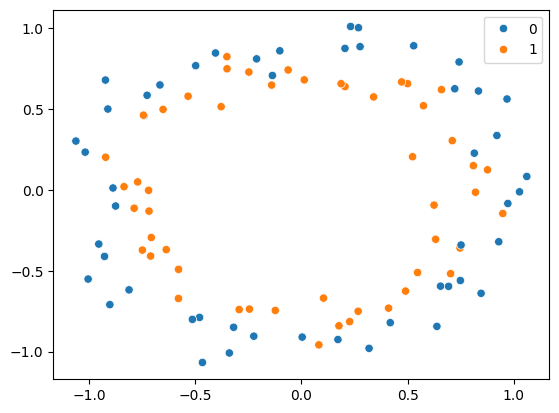

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [7]:
import time
history = model.fit(X_train, y_train, epochs = 3500, validation_data=(X_test, y_test), verbose = 0)

start = time.time()

print("Time required to run : ", time.time()-start) 

Time required to run :  2.3126602172851562e-05


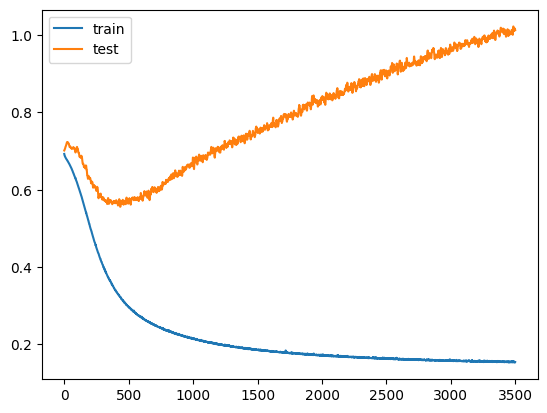

In [8]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test') 
plt.legend()
plt.show() 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 170us/step


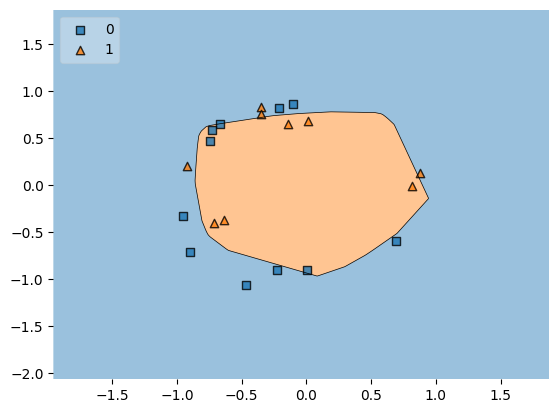

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)
plt.show()

# Early Stopping

In [11]:
model = Sequential()

model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5453 - loss: 0.6867 - val_accuracy: 0.4000 - val_loss: 0.7096
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5258 - loss: 0.6861 - val_accuracy: 0.4500 - val_loss: 0.7095
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5281 - loss: 0.6859 - val_accuracy: 0.4500 - val_loss: 0.7103
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5164 - loss: 0.6853 - val_accuracy: 0.4000 - val_loss: 0.7114
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5516 - loss: 0.6810 - val_accuracy: 0.4000 - val_loss: 0.7129
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5047 - loss: 0.6832 - val_accuracy: 0.4000 - val_loss: 0.7142
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5031 - loss: 0.6893 - val_accuracy: 0.4000 - val_loss: 0.7157
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5641 - loss: 0.6820 - val_accuracy: 0.4000 - val_loss

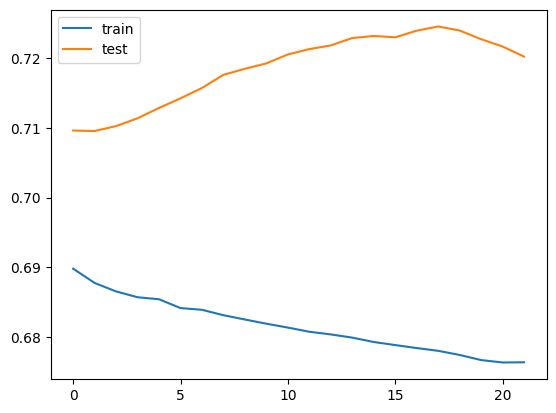

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 165us/step


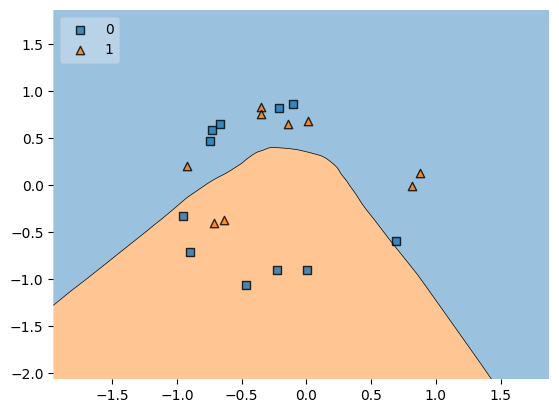

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()